In [363]:
import csv
import math
import pandas as pd

import numpy as np
%matplotlib inline
import collections

from datetime import datetime
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [364]:
t=pd.read_csv("Yes_Bank_Training.csv")

In [365]:
t.columns

Index(['serial_number', 'age_in_years', 'job_description', 'marital_status',
       'education_details', 'has_default', 'balance_in_account',
       'housing_status', 'previous_loan', 'phone_type', 'date',
       'month_of_year', 'call_duration', 'campaign_contacts', 'days_passed',
       'previous_contact', 'poutcome_of_campaign', 'outcome'],
      dtype='object')

In [366]:
t.balance_in_account.describe()

count    31649.000000
mean      1293.382540
std       2961.185138
min      -8019.000000
25%         47.000000
50%        397.000000
75%       1328.000000
max      98417.000000
Name: balance_in_account, dtype: float64

In [367]:
t.outcome.describe()

count     31649
unique        2
top          no
freq      29809
Name: outcome, dtype: object

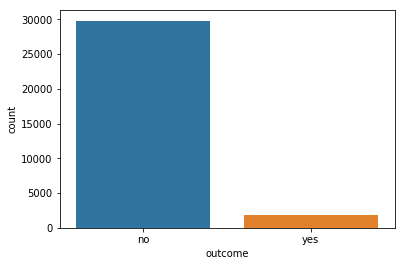

In [368]:
sns.countplot(t.outcome)

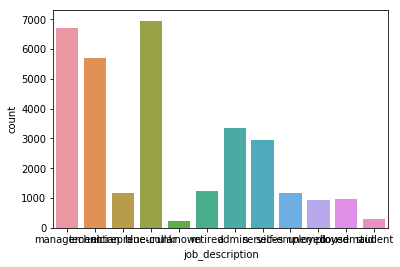

In [369]:
sns.countplot(t.job_description)

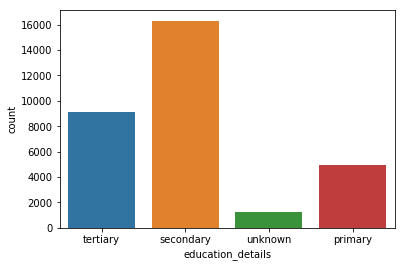

In [370]:
sns.countplot(t.education_details)

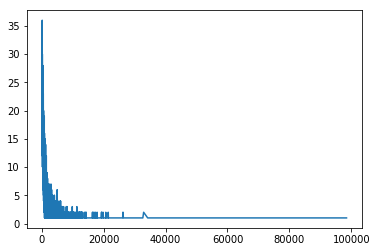

In [371]:
t[t['balance_in_account'] > 200]['balance_in_account'].value_counts().sort_index().plot.line()

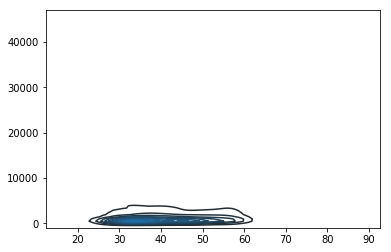

In [372]:

sns.kdeplot(t[t['balance_in_account']> 200].loc[:, ['age_in_years','balance_in_account' ]].dropna().sample(1000))

In [373]:
t.head(10)

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


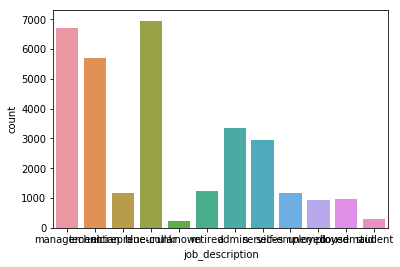

In [374]:
sns.countplot(t.job_description)

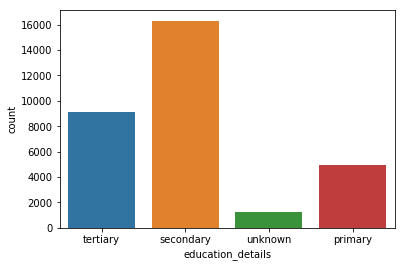

In [375]:
sns.countplot(t.education_details)

In [376]:
LE = LabelEncoder()
OHE = OneHotEncoder()

In [377]:
t.job_description.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [378]:
t["MaritalStatus"] = LE.fit_transform(t.marital_status)

In [379]:
t["EducationDetails"] = LE.fit_transform(t.education_details)

In [380]:
t["HasDefaulted"] = LE.fit_transform(t.has_default)

In [381]:
t["HousingStatus"] = LE.fit_transform(t.housing_status)

In [382]:
t["PreviousLoan"] = LE.fit_transform(t.previous_loan)

In [383]:
p= LE.fit_transform(t.phone_type)

In [430]:
train=t[['serial_number', 'age_in_years',"balance_in_account","date","call_duration","campaign_contacts","days_passed","previous_contact"]]

In [431]:
arr = LE.fit_transform(t.job_description)
t['JobDescEncoded'] = arr
labels = list(LE.classes_)

In [432]:
johe=OHE.fit_transform(t[["JobDescEncoded"]]).toarray()
job_en=pd.DataFrame(johe, columns=labels)
train=pd.concat([train,job_en],axis=1)

In [433]:
t.marital_status.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [434]:
arr = LE.fit_transform(t.marital_status)
t["MaritalStatus"] = arr
labels = list(LE.classes_)

In [435]:
ohe=OHE.fit_transform(t[["MaritalStatus"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
train=pd.concat([train,_en],axis=1)

In [436]:
t.education_details.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [437]:
arr = LE.fit_transform(t.education_details)
t["EducationDetails"] = arr
labels = list(LE.classes_)
labels[3]="unknown2"
labels

['primary', 'secondary', 'tertiary', 'unknown2']

In [438]:
ohe=OHE.fit_transform(t[["EducationDetails"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
train=pd.concat([train,_en],axis=1)

In [439]:
t.has_default.unique()

array(['no', 'yes'], dtype=object)

In [440]:
train["HasDefaulted"] = LE.fit_transform(t.has_default)

In [441]:
t.housing_status.unique()

array(['yes', 'no'], dtype=object)

In [442]:
train["HousingStatus"] = LE.fit_transform(t.housing_status)

In [443]:
t.previous_loan.unique()

array(['no', 'yes'], dtype=object)

In [444]:
train["PreviousLoan"] = LE.fit_transform(t.previous_loan)

In [445]:
arr = LE.fit_transform(t.phone_type)
t["PhoneType"] = arr
labels = list(LE.classes_)
labels

['cellular', 'telephone', 'unknown']

In [446]:
labels[2]="unknown3"

In [447]:
ohe=OHE.fit_transform(t[["PhoneType"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
train=pd.concat([train,_en],axis=1)

In [448]:
arr = LE.fit_transform(t.poutcome_of_campaign)
t["POutcome"] = arr
labels=LE.classes_

In [449]:
labels

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [450]:
labels[3]='unknown4'
labels

array(['failure', 'other', 'success', 'unknown4'], dtype=object)

In [451]:
ohe=OHE.fit_transform(t[["POutcome"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
train=pd.concat([train,_en],axis=1)

In [452]:
train["Outcome"] = LE.fit_transform(t.outcome)

In [453]:
X=train.loc[:, train.columns != 'Outcome']

In [454]:
y=train[["Outcome"]]

In [455]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [456]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [457]:
train_X.describe()

,serial_number,age_in_years,balance_in_account,date,call_duration,campaign_contacts,days_passed,previous_contact,admin.,blue-collar,...,HasDefaulted,HousingStatus,PreviousLoan,cellular,telephone,unknown3,failure,other,success,unknown4
count,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,...,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000,23736.000000
mean,15791.475270,41.083333,1286.379971,16.608738,252.951677,3.060794,10.780586,0.205131,0.106084,0.220467,...,0.023298,0.545037,0.182465,0.540866,0.053084,0.406050,0.045416,0.016557,0.002486,0.935541
std,9148.271639,9.602215,2963.682055,8.575373,264.357635,3.451315,47.935017,2.124126,0.307951,0.414570,...,0.150851,0.497978,0.386236,0.498338,0.224206,0.491104,0.208220,0.127608,0.049796,0.245574
min,1.000000,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7872.750000,33.000000,45.000000,9.000000,99.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15737.500000,40.000000,393.000000,18.000000,171.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23757.250000,49.000000,1331.000000,23.000000,306.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,31647.000000,94.000000,98417.000000,31.000000,4918.000000,51.000000,335.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [458]:
train_y.describe()

,Outcome
count,23736.000000
mean,0.058603
std,0.234885
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [459]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.06896246682674081


In [460]:
from sklearn.tree import DecisionTreeRegressor

In [461]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(train_X, train_y)
dtree_preds = dtree_model.predict(val_X)
print(mean_absolute_error(val_y, dtree_preds))

0.07190698849993682


In [462]:
test=pd.read_csv("Yes_Bank_Test.csv")

In [463]:
test.columns

Index(['serial_number', 'age_in_years', 'job_description', 'marital_status',
       'education_details', 'has_default', 'balance_in_account',
       'housing_status', 'previous_loan', 'phone_type', 'date',
       'month_of_year', 'call_duration', 'campaign_contacts', 'days_passed',
       'previous_contact', 'poutcome_of_campaign'],
      dtype='object')

In [464]:
from sklearn.linear_model import LogisticRegression

In [465]:
log_model = LogisticRegression()
log_model.fit(train_X, train_y)
log_preds = log_model.predict(val_X)
print(mean_absolute_error(val_y, log_preds))

0.053077214709970934


In [466]:
import xgboost as xgb

In [467]:
xgtrees_train = xgb.DMatrix(train_X, label=train_y, feature_names=train_X.columns)

In [468]:
train_X.columns

Index(['serial_number', 'age_in_years', 'balance_in_account', 'date',
       'call_duration', 'campaign_contacts', 'days_passed', 'previous_contact',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'divorced', 'married', 'single', 'primary',
       'secondary', 'tertiary', 'unknown2', 'HasDefaulted', 'HousingStatus',
       'PreviousLoan', 'cellular', 'telephone', 'unknown3', 'failure', 'other',
       'success', 'unknown4'],
      dtype='object')

In [469]:
params1 = {
    'objective'       :'reg:linear',
    'eta'             : 0.025,
    'max_depth'       : 10,
    'subsample'       : 0.9,
    'min_child_weight': 1000,
    'seed'            : 42,
    'base_score'      : 0,
    'silent'         : 1,
}


In [470]:
bst = xgb.train(params1, xgtrees_train, 10)

In [471]:
xgtrees_test = xgb.DMatrix(val_X,  feature_names=train_X.columns)
xgb_prd = bst.predict(xgtrees_test)
print(mean_absolute_error(val_y, xgb_prd))

0.061997810814094986


In [472]:
test = pd.read_csv("Yes_Bank_Test.csv")

In [473]:
ttest=test[['serial_number', 'age_in_years',"balance_in_account","date","call_duration","campaign_contacts","days_passed","previous_contact"]]

In [474]:
ttest.describe()

,serial_number,age_in_years,balance_in_account,date,call_duration,campaign_contacts,days_passed,previous_contact
count,13562.00000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000
mean,6781.50000,40.526397,1523.036278,13.959151,271.592980,2.067173,108.755641,1.447943
std,3915.15651,12.676850,3225.811487,7.347001,245.404458,1.596162,145.989578,2.787932
min,1.00000,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,3391.25000,31.000000,147.000000,8.000000,115.000000,1.000000,-1.000000,0.000000
50%,6781.50000,37.000000,565.000000,14.000000,204.000000,2.000000,-1.000000,0.000000
75%,10171.75000,48.000000,1679.750000,18.000000,343.000000,2.000000,188.000000,2.000000
max,13562.00000,95.000000,102127.000000,31.000000,3785.000000,23.000000,871.000000,58.000000


In [475]:
arr = LE.fit_transform(test.job_description)
test["JobDescEncoded"] = arr
labels = list(LE.classes_)


In [476]:
labels

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [477]:
ohe=OHE.fit_transform(test[["JobDescEncoded"]]).toarray()
job_en=pd.DataFrame(ohe, columns=labels)
ttest=pd.concat([ttest,job_en],axis=1)

In [479]:
ttest.columns

Index(['serial_number', 'age_in_years', 'balance_in_account', 'date',
       'call_duration', 'campaign_contacts', 'days_passed', 'previous_contact',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [480]:
arr = LE.fit_transform(test.marital_status)
test["MaritalStatus"] = arr
labels = list(LE.classes_)

In [481]:
labels

['divorced', 'married', 'single']

In [482]:
ohe=OHE.fit_transform(test[["MaritalStatus"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
ttest=pd.concat([ttest,_en],axis=1)

In [483]:
arr = LE.fit_transform(test.education_details)
test["EducationDetails"] = arr
labels = list(LE.classes_)
labels[3]="unknown2"
labels

['primary', 'secondary', 'tertiary', 'unknown2']

In [484]:
ohe=OHE.fit_transform(test[["EducationDetails"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
ttest=pd.concat([ttest,_en],axis=1)

In [485]:
ttest["HasDefaulted"] = LE.fit_transform(test.has_default)

In [486]:
ttest["HousingStatus"] = LE.fit_transform(test.housing_status)

In [487]:
ttest["PreviousLoan"] = LE.fit_transform(test.previous_loan)

In [488]:
arr = LE.fit_transform(test.phone_type)
test["PhoneType"] = arr
labels = list(LE.classes_)
labels

['cellular', 'telephone', 'unknown']

In [489]:
labels[2]='unknown3'

In [490]:
labels

['cellular', 'telephone', 'unknown3']

In [491]:
ohe=OHE.fit_transform(test[["PhoneType"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
ttest=pd.concat([ttest,_en],axis=1)

In [492]:
arr = LE.fit_transform(test.poutcome_of_campaign)
test["POutcome"] = arr
labels=LE.classes_

In [493]:
labels

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [494]:
labels[3]='unknown4'

In [495]:
ohe=OHE.fit_transform(test[["POutcome"]]).toarray()
_en=pd.DataFrame(ohe, columns=labels)
ttest=pd.concat([ttest,_en],axis=1)

In [496]:
test_preds = log_model.predict(ttest)

In [497]:
t_preds=pd.DataFrame(test_preds,columns=["Preds"])

In [498]:
s=test[t_preds.values==1]

In [499]:
t_preds.iloc[13551]

Preds    1
Name: 13551, dtype: int32

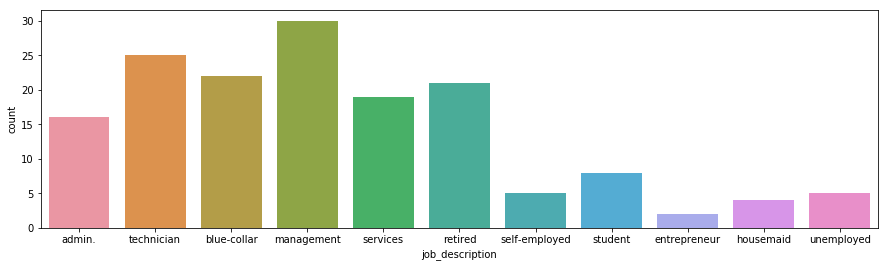

In [500]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(s.job_description,ax=ax)

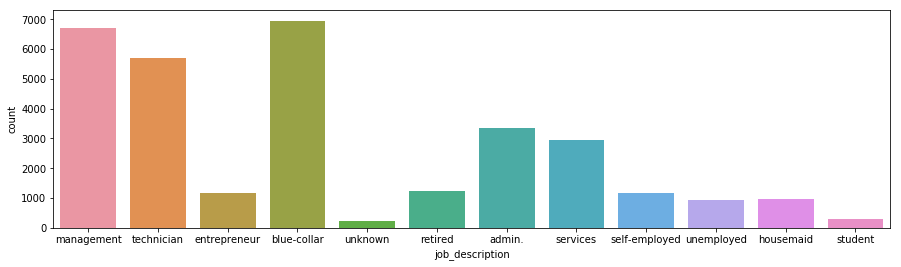

In [501]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(t.job_description,ax=ax)

In [502]:
l_preds=pd.DataFrame(log_preds)

In [503]:
log_model.coef_.shape

(1, 37)

In [504]:
train_X.shape

(23736, 37)

In [505]:
a=train_X.iloc[9:15][:]

In [506]:
a.shape, log_model.coef_.shape

((6, 37), (1, 37))

In [507]:
a.dot(log_model.coef_.T).values

array([[-2.67621034],
       [ 9.73633685],
       [-2.37179858],
       [-0.25162736],
       [-3.79607448],
       [-1.36582104]])

In [508]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
sigmoid(a.dot(log_model.coef_.T).values + log_model.intercept_ ) 

array([[0.02243111],
       [0.99982278],
       [0.03017189],
       [0.20586433],
       [0.00743212],
       [0.0784041 ]])

In [509]:
sigmoid(a.dot(log_model.coef_.T).values + log_model.intercept_ ).round()

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

Merge with test data

In [510]:
test_preds_all = pd.concat([test,t_preds],axis=1)

In [516]:
pos_outcome = test_preds_all.query('Preds ==1')
pos_outcome.shape

(157, 23)

In [517]:
pos_outcome = test_preds_all.loc[test_preds_all.Preds ==1]
pos_outcome.shape

(157, 23)

Plot the positives with job wise

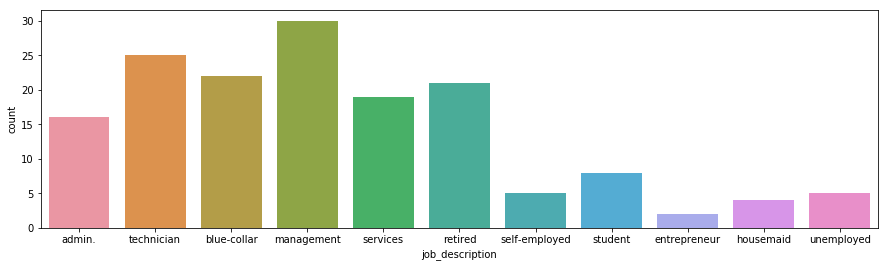

In [514]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(pos_outcome.job_description,ax=ax)

In [362]:
test_preds_all.to_csv("test_preds_all.csv", encoding='utf-8', index=False)

In [556]:
p=t_preds.loc[(t_preds.loc[:]==1).values.ravel()]
p.size

157

In [568]:
t_preds.loc[:'==0']x`

,Preds
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
